In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import random

random.seed(10)
print(random.random()) 

sc.settings.verbosity = 1
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("ticks")

0.5714025946899135


In [2]:
sc.settings.verbosity = 1
sns.set(font_scale=1)
sc.settings.set_figure_params(dpi=150)
sns.set_style("ticks")

In [3]:
adata = sc.read_10x_h5(filename="3_464/output-XETG00045__0021464__3__20240612__152143/cell_feature_matrix.h5")

In [4]:
adata

AnnData object with n_obs × n_vars = 56867 × 347
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
adata.var

gene_ids    feature_types   genome
2010300C02Rik  ENSMUSG00000026090  Gene Expression  Unknown
Acsbg1         ENSMUSG00000032281  Gene Expression  Unknown
Acta2          ENSMUSG00000035783  Gene Expression  Unknown
Acvrl1         ENSMUSG00000000530  Gene Expression  Unknown
Adamts2        ENSMUSG00000036545  Gene Expression  Unknown
...                           ...              ...      ...
Zfp366         ENSMUSG00000050919  Gene Expression  Unknown
Zfp536         ENSMUSG00000043456  Gene Expression  Unknown
Zfpm2          ENSMUSG00000022306  Gene Expression  Unknown
Zic1           ENSMUSG00000032368  Gene Expression  Unknown
Zic5           ENSMUSG00000041703  Gene Expression  Unknown

[347 rows x 3 columns]

In [6]:
df = pd.read_csv("3_464/output-XETG00045__0021464__3__20240612__152143/cells.csv.gz")

In [7]:
df

cell_id   x_centroid   y_centroid  transcript_counts  \
0      aaaajaaf-1  1411.426758   999.439941                 62   
1      aaadcoia-1  1396.442261  1006.323792                180   
2      aaadejkp-1  1415.331543  1007.018555                 78   
3      aaadimbl-1  1405.569824  1003.989685                144   
4      aaafapbp-1  1443.011841  1016.779846                 83   
...           ...          ...          ...                ...   
56862  oioadjne-1  3121.581543  2574.121826                174   
56863  oioanghn-1  3116.201660  2566.096191                127   
56864  oiobcfac-1  3112.355713  2556.120117                153   
56865  oiobhlco-1  3121.166016  2557.583740                 98   
56866  oiobnmja-1  3104.235352  2558.437500                 84   

       control_probe_counts  control_codeword_counts  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         1                        0   
4                         0                        0   
...                     ...                      ...   
56862                     0                        0   
56863                     0                        0   
56864                     0                        0   
56865                     0                        0   
56866                     0                        0   

       unassigned_codeword_counts  deprecated_codeword_counts  total_counts  \
0                               0                           0            62   
1                               0                           0           180   
2                               0                           0            78   
3                               0                           0           145   
4                               0                           0            83   
...                           ...                         ...           ...   
56862                           0                           0           174   
56863                           0                           0           127   
56864                           0                           0           153   
56865                           0                           0            98   
56866                           0                           0            84   

        cell_area  nucleus_area  
0       85.932347     19.281719  
1       85.932347     29.712814  
2       46.736720     25.784220  
3       83.945472     37.253908  
4       76.991409     36.847501  
...           ...           ...  
56862  139.894068     67.147346  
56863   93.879847     50.665314  
56864  111.626254     68.818127  
56865   74.733596     38.382814  
56866   76.855940     54.142346  

[56867 rows x 11 columns]

In [8]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [9]:
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaaajaaf-1  aaaajaaf-1  1411.426758   999.439941                 62   
aaadcoia-1  aaadcoia-1  1396.442261  1006.323792                180   
aaadejkp-1  aaadejkp-1  1415.331543  1007.018555                 78   
aaadimbl-1  aaadimbl-1  1405.569824  1003.989685                144   
aaafapbp-1  aaafapbp-1  1443.011841  1016.779846                 83   
...                ...          ...          ...                ...   
oioadjne-1  oioadjne-1  3121.581543  2574.121826                174   
oioanghn-1  oioanghn-1  3116.201660  2566.096191                127   
oiobcfac-1  oiobcfac-1  3112.355713  2556.120117                153   
oiobhlco-1  oiobhlco-1  3121.166016  2557.583740                 98   
oiobnmja-1  oiobnmja-1  3104.235352  2558.437500                 84   

            control_probe_counts  control_codeword_counts  \
aaaajaaf-1                     0                        0   
aaadcoia-1                     0                        0   
aaadejkp-1                     0                        0   
aaadimbl-1                     1                        0   
aaafapbp-1                     0                        0   
...                          ...                      ...   
oioadjne-1                     0                        0   
oioanghn-1                     0                        0   
oiobcfac-1                     0                        0   
oiobhlco-1                     0                        0   
oiobnmja-1                     0                        0   

            unassigned_codeword_counts  deprecated_codeword_counts  \
aaaajaaf-1                           0                           0   
aaadcoia-1                           0                           0   
aaadejkp-1                           0                           0   
aaadimbl-1                           0                           0   
aaafapbp-1                           0                           0   
...                                ...                         ...   
oioadjne-1                           0                           0   
oioanghn-1                           0                           0   
oiobcfac-1                           0                           0   
oiobhlco-1                           0                           0   
oiobnmja-1                           0                           0   

            total_counts   cell_area  nucleus_area  
aaaajaaf-1            62   85.932347     19.281719  
aaadcoia-1           180   85.932347     29.712814  
aaadejkp-1            78   46.736720     25.784220  
aaadimbl-1           145   83.945472     37.253908  
aaafapbp-1            83   76.991409     36.847501  
...                  ...         ...           ...  
oioadjne-1           174  139.894068     67.147346  
oioanghn-1           127   93.879847     50.665314  
oiobcfac-1           153  111.626254     68.818127  
oiobhlco-1            98   74.733596     38.382814  
oiobnmja-1            84   76.855940     54.142346  

[56867 rows x 11 columns]

In [10]:
df1 = pd.read_csv("/home/julia/Xenioum/3_464/output-XETG00045__0021464__3__20240612__152143/metrics_summary.csv")
df1

run_name     cassette_name  region_name   panel_name  \
0  240612_Adameyko_run1  EmbryonicDay_8_5            3  mBrain_100g   

  panel_design_id predesigned_panel_id   region_area  total_cell_area  \
0          CAZWM2          mBrain_v1.1  1.671988e+07     4.404062e+06   

   total_high_quality_decoded_transcripts  fraction_transcripts_decoded_q20  \
0                                 5812589                          0.427481   

   ...  fraction_of_ambiguous_cell_mask_pixels  \
0  ...                                     NaN   

   fraction_of_nucleus_polygons_removed  fraction_of_cell_polygons_removed  \
0                                   NaN                                NaN   

   fraction_of_nuclei_without_cell  number_of_cell_non_simple_polygons  \
0                              NaN                                 NaN   

   number_of_cell_multi_polygons  number_of_nucleus_non_simple_polygons  \
0                            NaN                                    NaN   

   number_of_nucleus_multi_polygons  segmented_cell_imported_frac  \
0                               NaN                           NaN   

   segmented_cell_imported_count  
0                            NaN  

[1 rows x 48 columns]

In [11]:
table=adata.obs.copy()

In [12]:
table['region'] = 3
table['EmbryonicDay_8_5'] = 8.5
table['cell_id_duplicate'] = '8_5_region3_' + table['cell_id']
#adata.obs=table

In [13]:
adata.obs=table

In [14]:
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaaajaaf-1  aaaajaaf-1  1411.426758   999.439941                 62   
aaadcoia-1  aaadcoia-1  1396.442261  1006.323792                180   
aaadejkp-1  aaadejkp-1  1415.331543  1007.018555                 78   
aaadimbl-1  aaadimbl-1  1405.569824  1003.989685                144   
aaafapbp-1  aaafapbp-1  1443.011841  1016.779846                 83   
...                ...          ...          ...                ...   
oioadjne-1  oioadjne-1  3121.581543  2574.121826                174   
oioanghn-1  oioanghn-1  3116.201660  2566.096191                127   
oiobcfac-1  oiobcfac-1  3112.355713  2556.120117                153   
oiobhlco-1  oiobhlco-1  3121.166016  2557.583740                 98   
oiobnmja-1  oiobnmja-1  3104.235352  2558.437500                 84   

            control_probe_counts  control_codeword_counts  \
aaaajaaf-1                     0                        0   
aaadcoia-1                     0                        0   
aaadejkp-1                     0                        0   
aaadimbl-1                     1                        0   
aaafapbp-1                     0                        0   
...                          ...                      ...   
oioadjne-1                     0                        0   
oioanghn-1                     0                        0   
oiobcfac-1                     0                        0   
oiobhlco-1                     0                        0   
oiobnmja-1                     0                        0   

            unassigned_codeword_counts  deprecated_codeword_counts  \
aaaajaaf-1                           0                           0   
aaadcoia-1                           0                           0   
aaadejkp-1                           0                           0   
aaadimbl-1                           0                           0   
aaafapbp-1                           0                           0   
...                                ...                         ...   
oioadjne-1                           0                           0   
oioanghn-1                           0                           0   
oiobcfac-1                           0                           0   
oiobhlco-1                           0                           0   
oiobnmja-1                           0                           0   

            total_counts   cell_area  nucleus_area  region  EmbryonicDay_8_5  \
aaaajaaf-1            62   85.932347     19.281719       3               8.5   
aaadcoia-1           180   85.932347     29.712814       3               8.5   
aaadejkp-1            78   46.736720     25.784220       3               8.5   
aaadimbl-1           145   83.945472     37.253908       3               8.5   
aaafapbp-1            83   76.991409     36.847501       3               8.5   
...                  ...         ...           ...     ...               ...   
oioadjne-1           174  139.894068     67.147346       3               8.5   
oioanghn-1           127   93.879847     50.665314       3               8.5   
oiobcfac-1           153  111.626254     68.818127       3               8.5   
oiobhlco-1            98   74.733596     38.382814       3               8.5   
oiobnmja-1            84   76.855940     54.142346       3               8.5   

                 cell_id_duplicate  
aaaajaaf-1  8_5_region3_aaaajaaf-1  
aaadcoia-1  8_5_region3_aaadcoia-1  
aaadejkp-1  8_5_region3_aaadejkp-1  
aaadimbl-1  8_5_region3_aaadimbl-1  
aaafapbp-1  8_5_region3_aaafapbp-1  
...                            ...  
oioadjne-1  8_5_region3_oioadjne-1  
oioanghn-1  8_5_region3_oioanghn-1  
oiobcfac-1  8_5_region3_oiobcfac-1  
oiobhlco-1  8_5_region3_oiobhlco-1  
oiobnmja-1  8_5_region3_oiobnmja-1  

[56867 rows x 14 columns]

In [15]:
prefix = "8_5_region3_"
adata.obs['cell_id'] = prefix + adata.obs['cell_id']

In [16]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [17]:
adata.obsm

AxisArrays with keys: spatial

In [18]:
### Calculate quality control metrics
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20,30,40), inplace=True)

In [19]:
### calculate and print the percentage of control probes
cprobes = (adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100)
print(f"Negative DNA probe count % : {cprobes}")

Negative DNA probe count % : 0.010718584537387662


In [20]:
### calculate and print the percentage of control codewords 
cwords = (adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100)
print(f"Negative decoding count % : {cwords}")

Negative decoding count % : 0.011622134638886459


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

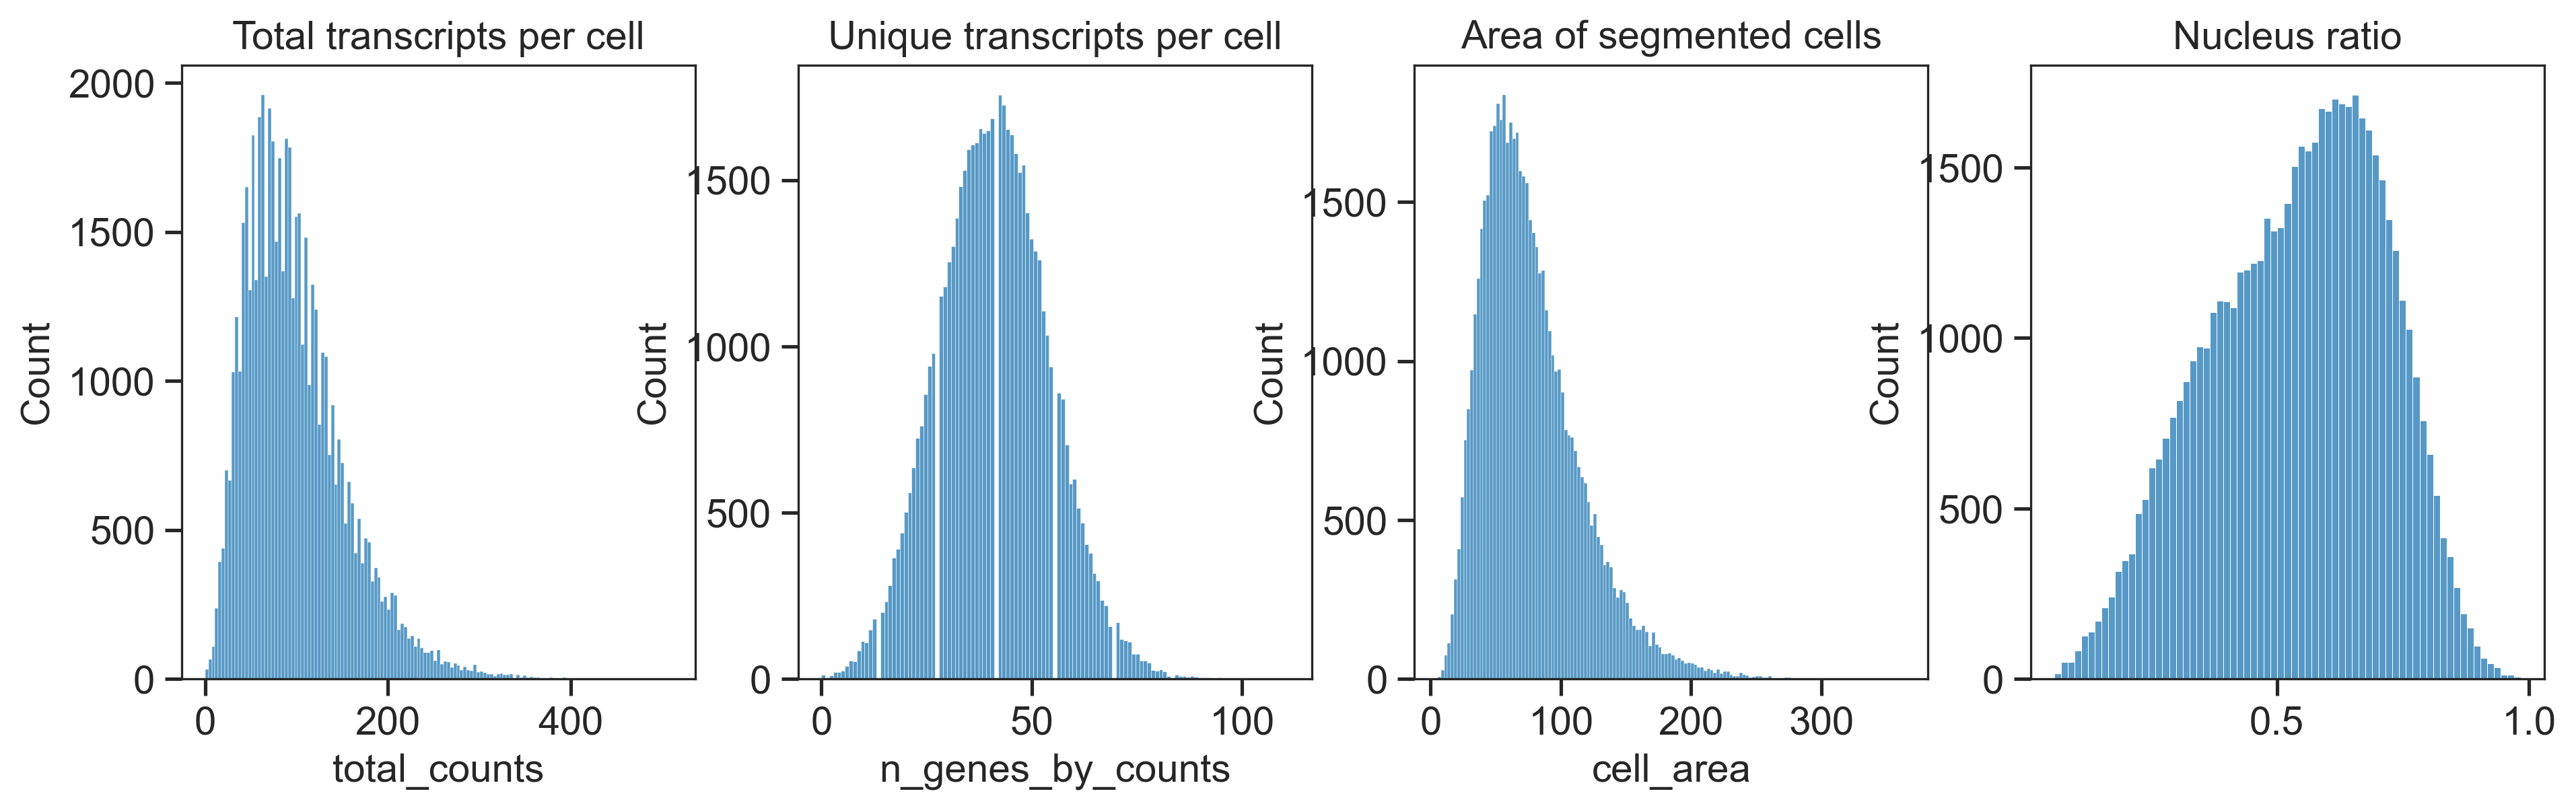

In [21]:
### plot the distribution of: 
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])

axs[1].set_title("Unique transcripts per cell")
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1])

axs[2].set_title("Area of segmented cells")
sns.histplot(adata.obs["cell_area"], kde=False, ax=axs[2])

axs[3].set_title("Nucleus ratio")
sns.histplot(adata.obs["nucleus_area"] / adata.obs["cell_area"], kde=False, ax=axs[3])

In [22]:
adata

AnnData object with n_obs × n_vars = 56867 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

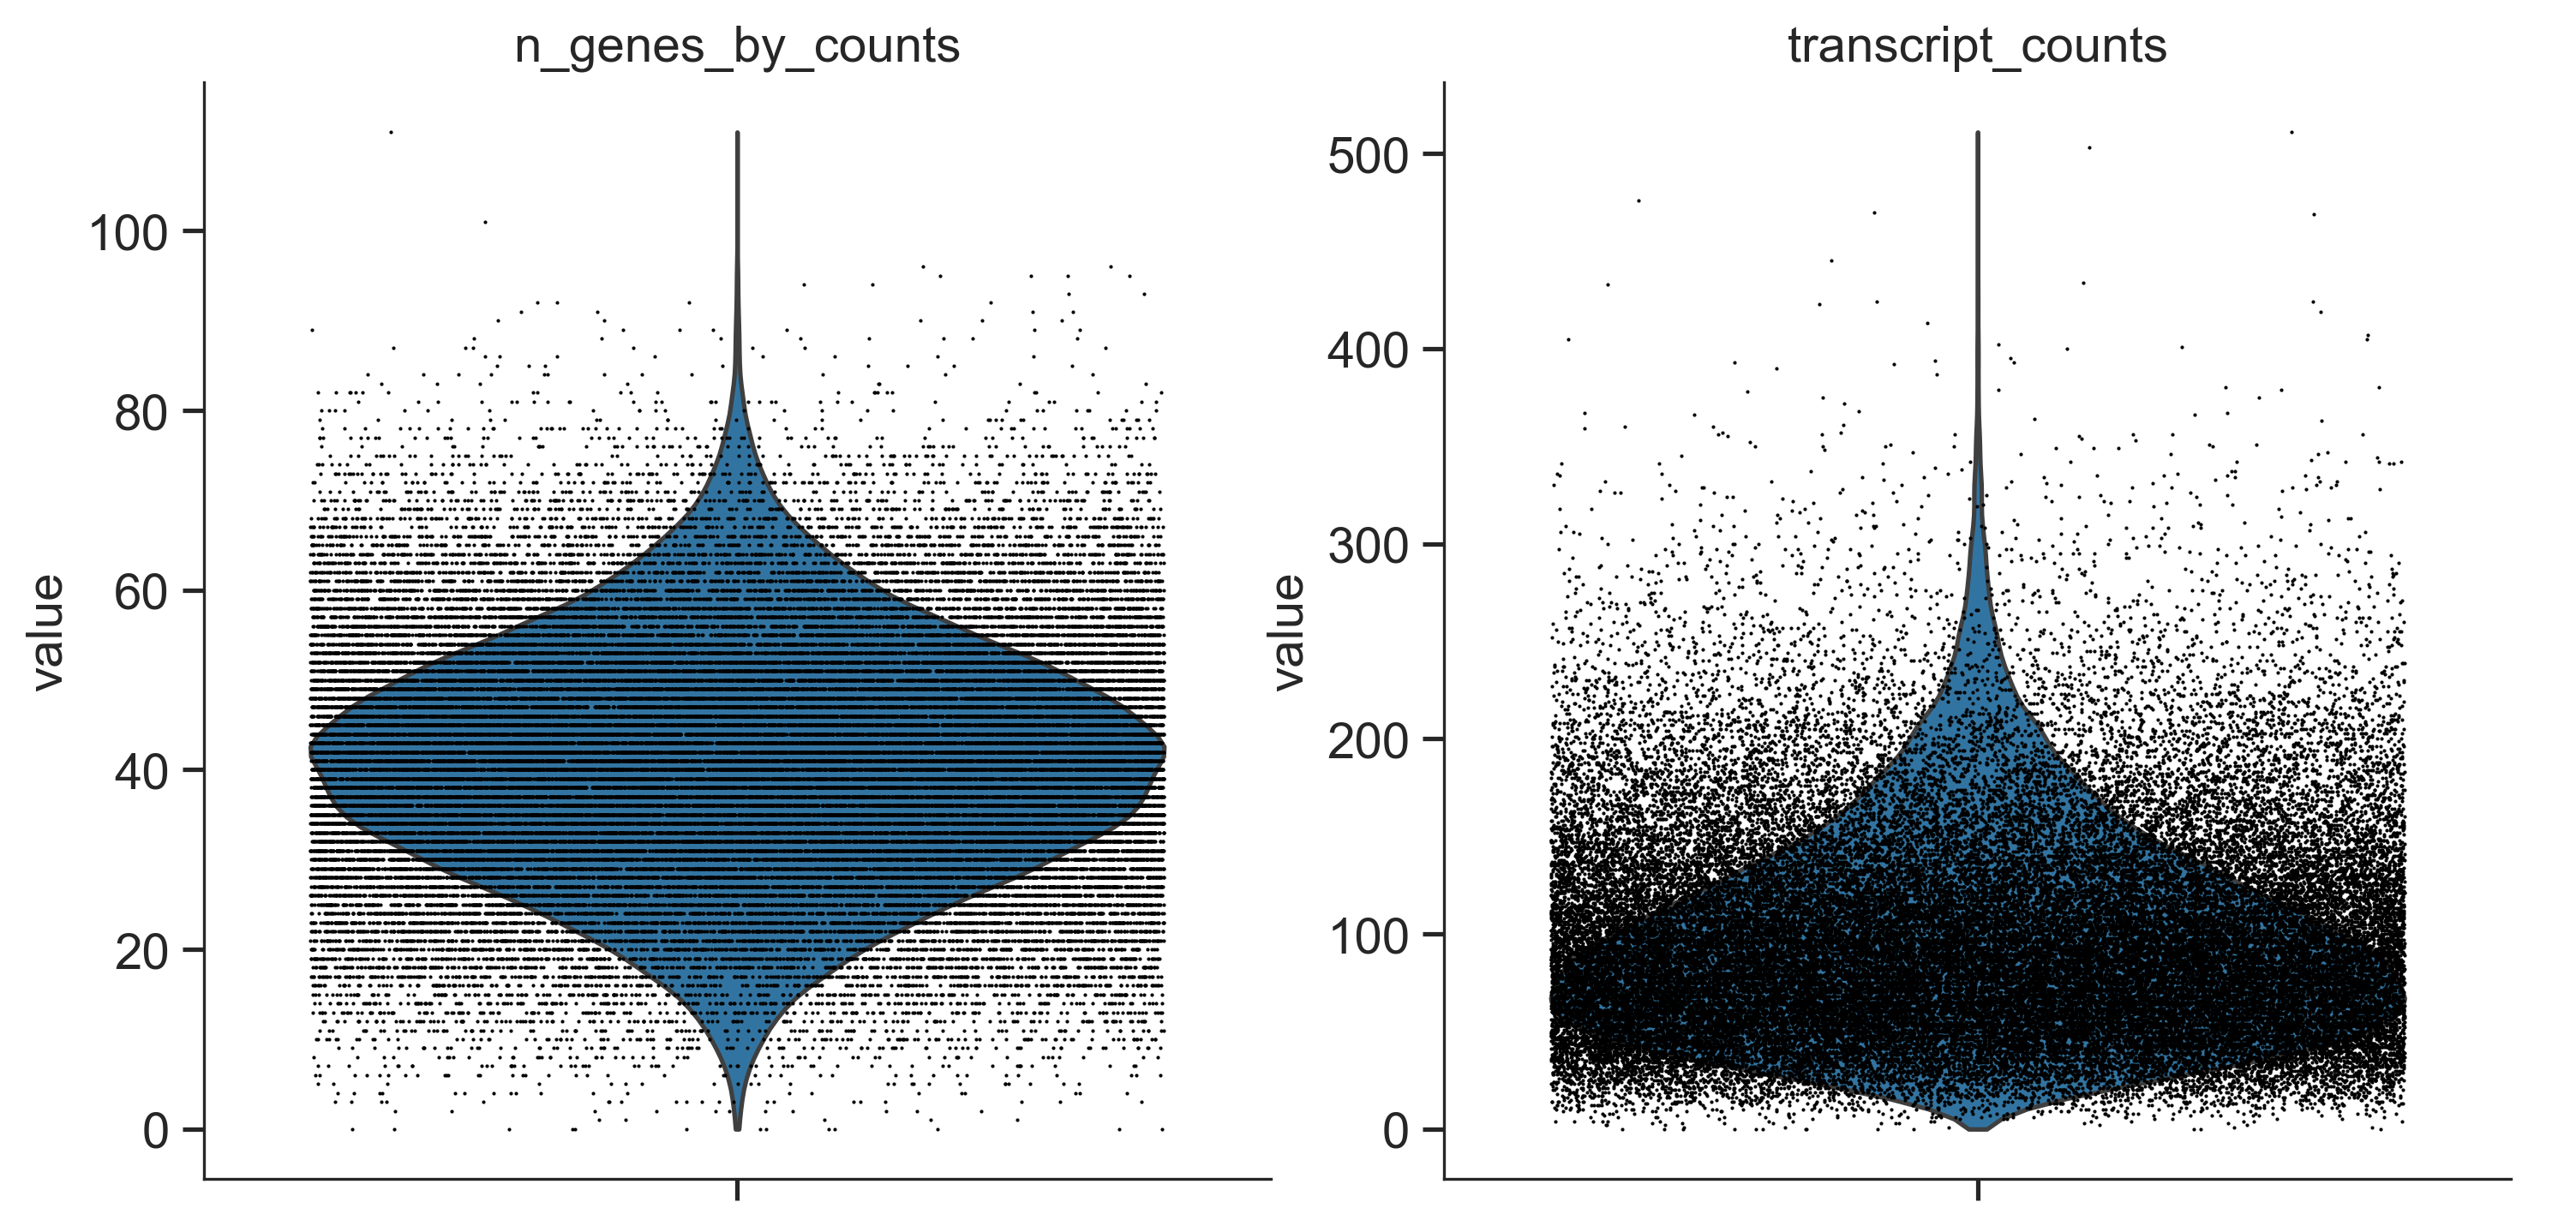

In [23]:
# Visualize the number of genes and transcripts per cell
sc.pl.violin(adata, ['n_genes_by_counts', 'transcript_counts'], jitter=0.4, multi_panel=True)

In [24]:
# Subset the data
adata = adata[(adata.obs['n_genes_by_counts'] > 20) & (adata.obs['n_genes_by_counts'] < 100) & 
            (adata.obs['transcript_counts'] > 15) & (adata.obs['transcript_counts'] < 470), :]

In [25]:
adata

View of AnnData object with n_obs × n_vars = 53570 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'EmbryonicDay_8_5', 'cell_id_duplicate', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_30_genes', 'pct_counts_in_top_40_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [26]:
adata.write_h5ad('/home/julia/Xenioum/h5ad/3_464_working_qc.h5ad')

In [27]:
adata.raw = adata

In [28]:
## standard scanpy workflow
sc.pp.normalize_total(adata, inplace=True) # Normalize counts per cell
sc.pp.log1p(adata) # Logarithmize

# sc.pp.highly_variable_genes (adata) # 313 genes

sc.pp.pca(adata) # do principal component analysis
sc.pp.neighbors(adata, n_neighbors=45, n_pcs=25) # compute a neighborhood graph
sc.tl.umap(adata) # embed the neighborhood graph of the data
sc.tl.leiden(adata, resolution=6.5) # cluster the cells into subgroups

/tmp/ipykernel_2624873/2133548394.py:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=6.5) # cluster the cells into subgroups


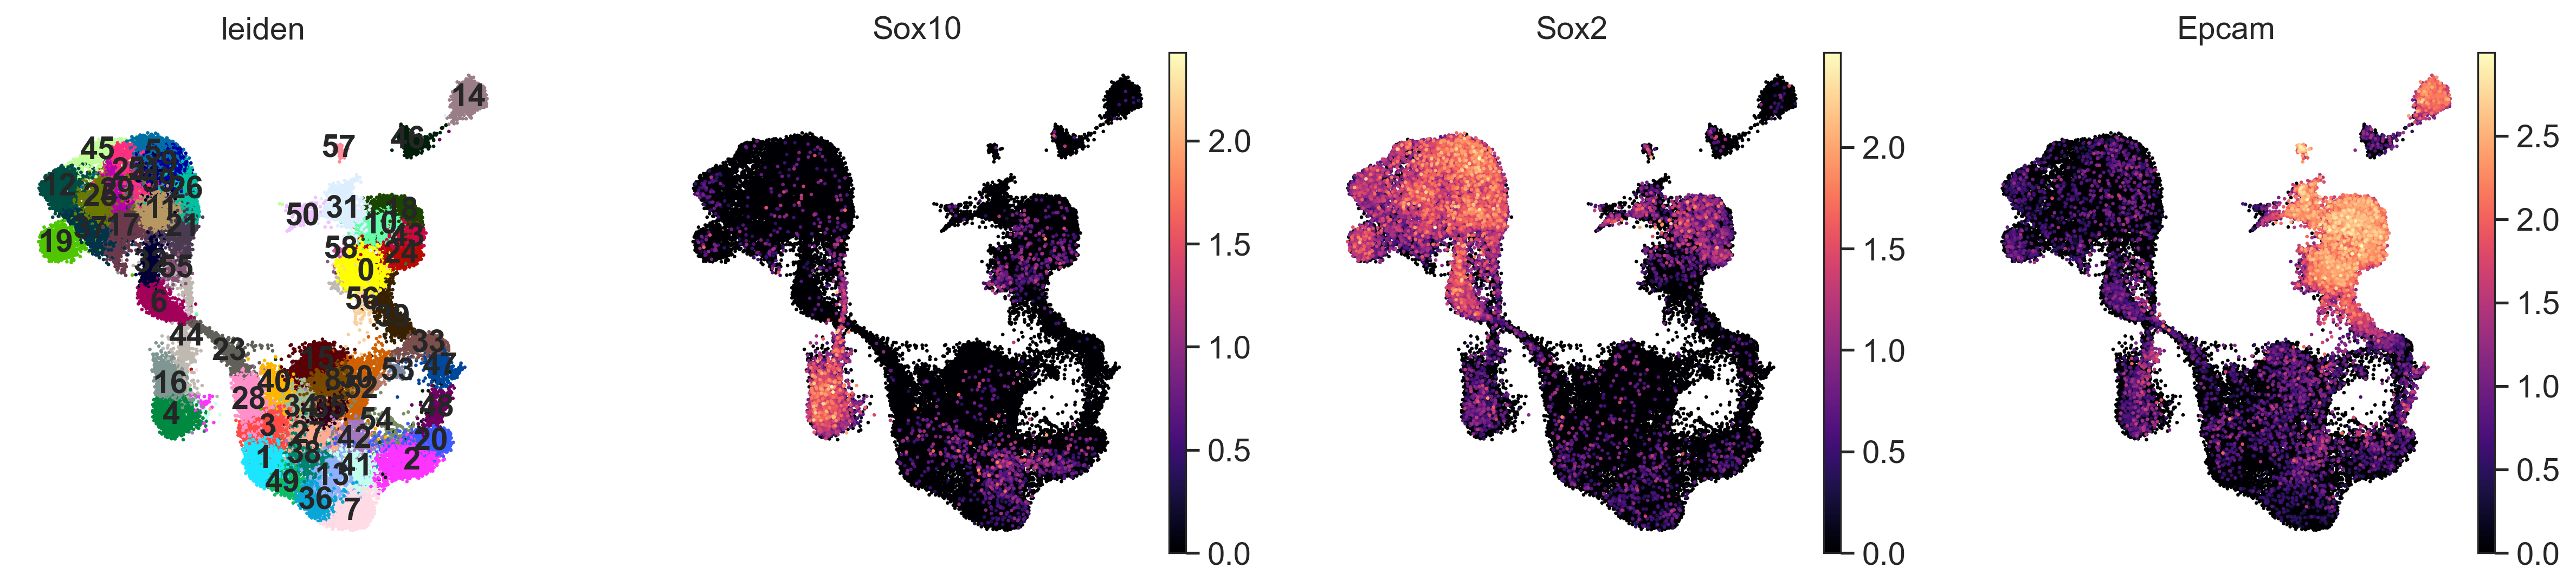

In [29]:
sc.pl.umap(adata, color=['leiden', 'Sox10', 'Sox2', 'Epcam'], 
           size=10, frameon=False,  color_map='magma', legend_loc='on data')


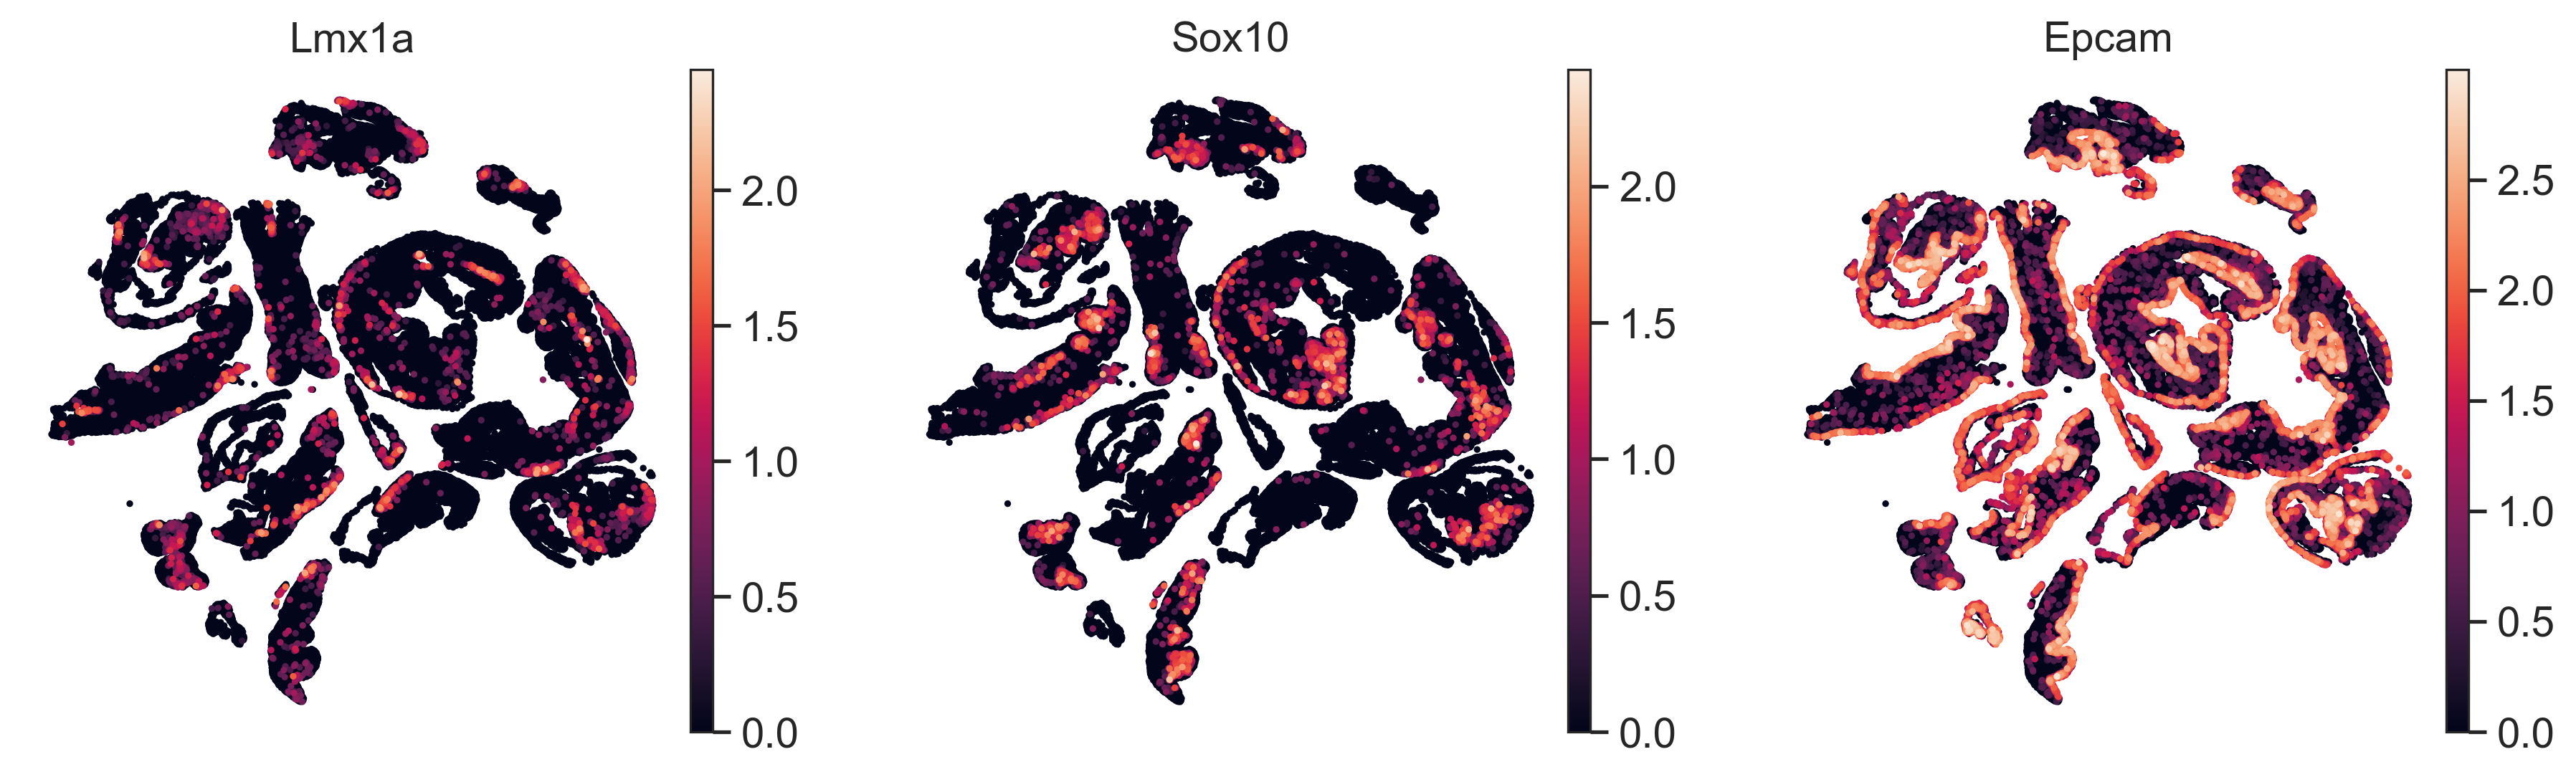

In [30]:
adata.obsm["X_spatial"] = adata.obsm["spatial"].copy()
sc.pl.embedding(adata, basis="X_spatial", color=['Lmx1a', 'Sox10', 'Epcam'], frameon=False, s=20)

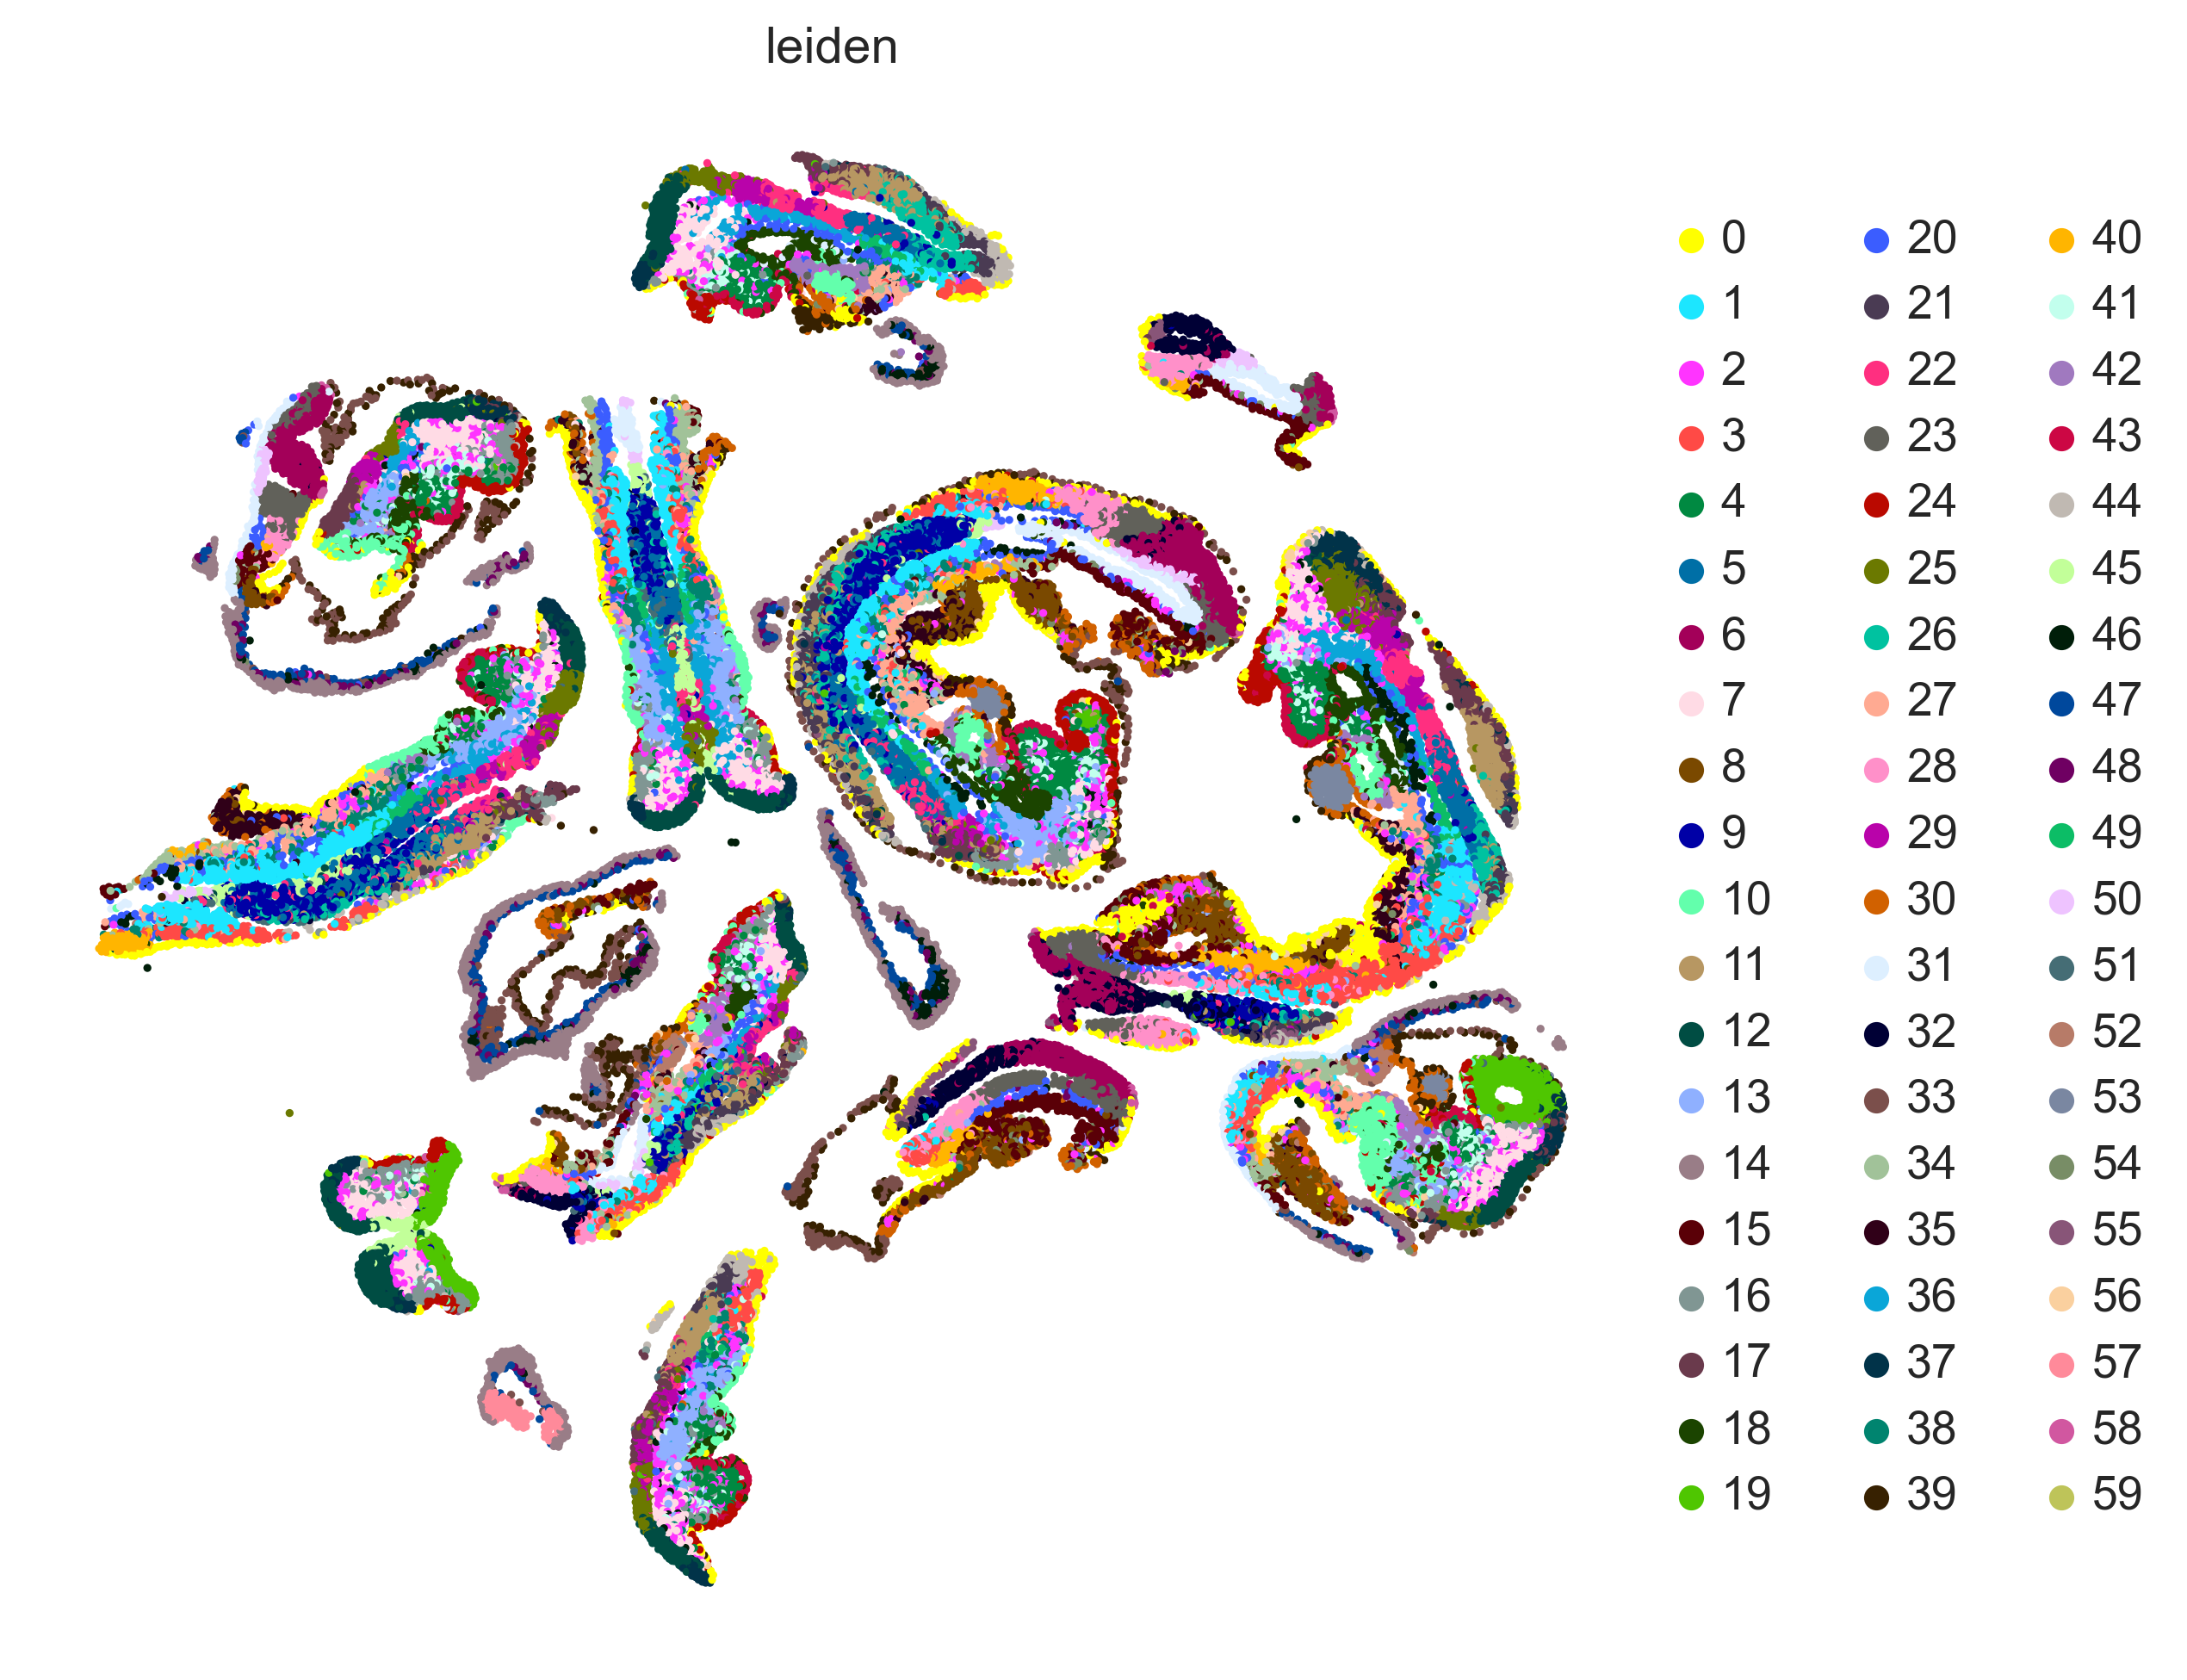

In [31]:
plt.rcParams['figure.figsize'] = [8, 8]  # width, height in inches
# Plot the spatial embedding for cluster 5
sc.pl.embedding(adata, basis='X_spatial', color='leiden', size=20, frameon=False)

In [32]:
adata.write_h5ad('/home/julia/Xenioum/h5ad/3_464_working_umap.h5ad')